This is based on
https://www.datacamp.com/tutorial/pca-analysis-r

In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
# We take only numerical data, we discard vs and am, which denote engine block and tranmission type respectively
mtcars.pca <- prcomp(mtcars[,c(1:7,10,11)], center = TRUE,scale. = TRUE)
summary(mtcars.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3782 1.4429 0.71008 0.51481 0.42797 0.35184 0.32413
Proportion of Variance 0.6284 0.2313 0.05602 0.02945 0.02035 0.01375 0.01167
Cumulative Proportion  0.6284 0.8598 0.91581 0.94525 0.96560 0.97936 0.99103
                          PC8     PC9
Standard deviation     0.2419 0.14896
Proportion of Variance 0.0065 0.00247
Cumulative Proportion  0.9975 1.00000

The proportion of each principal component explains a percentage of the total variation in the dataset. That is to say: PC1 explains 63% of the total variance, which means that nearly two-thirds of the information in the dataset (9 variables) can be encapsulated by just that one Principal Component. PC2 explains 23% of the variance. So, by knowing the position of a sample in relation to just PC1 and PC2.

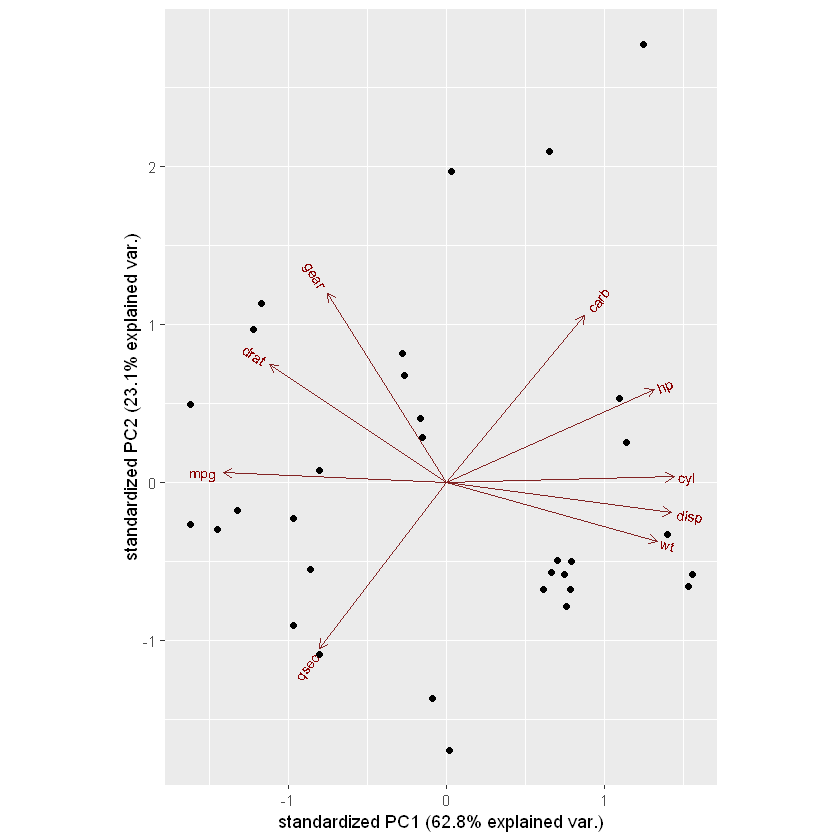

In [4]:
# install.packages("devtools", type = "win.binary") on Rstudio terminal
# install_github("vqv/ggbiplot")
library(devtools)
library(ggbiplot)

ggbiplot(mtcars.pca)

Here, you see that the variables hp, cyl, and disp all contribute to PC1, with higher values in those variables moving the samples to the right on this plot. 

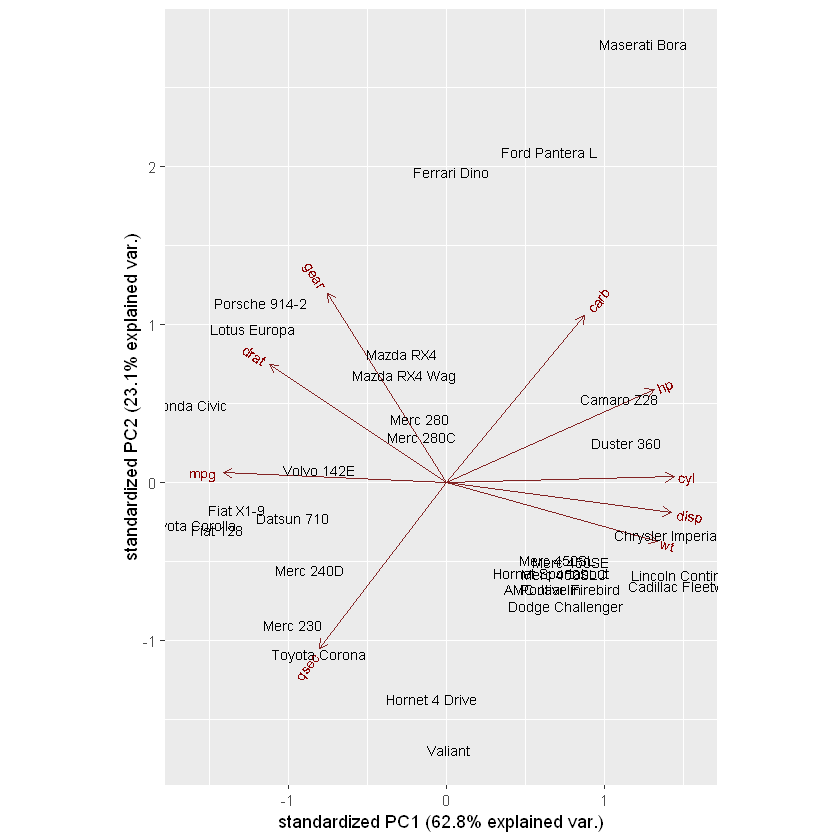

In [5]:
ggbiplot(mtcars.pca, labels=rownames(mtcars))

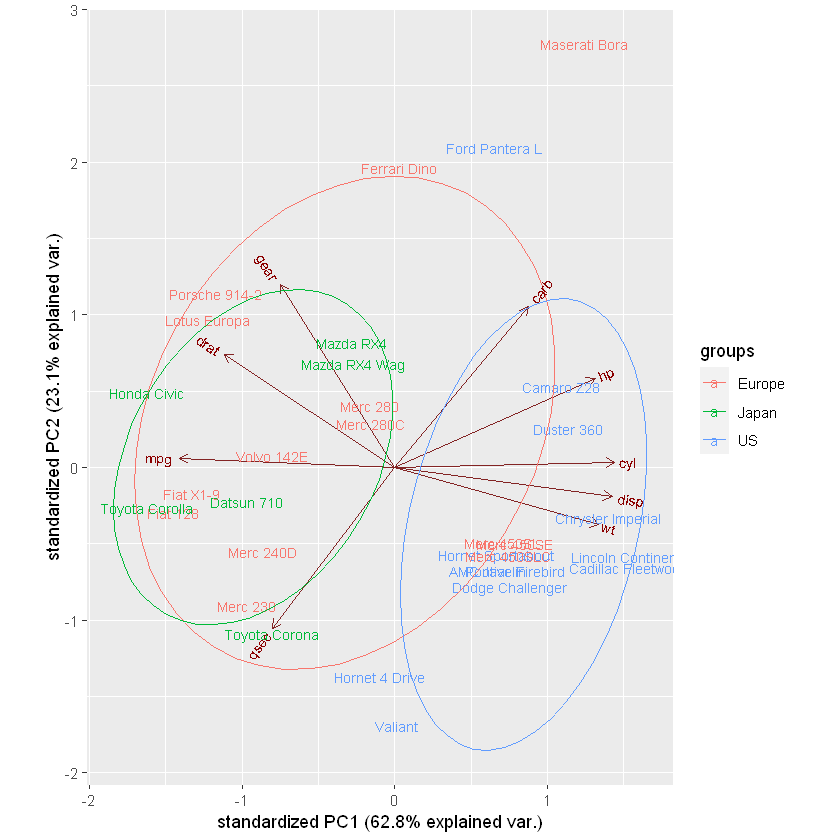

In [6]:
# We categorize the cars by the country of the make.
mtcars.country <- c(rep("Japan", 3), rep("US",4), rep("Europe", 7),rep("US",3), "Europe", rep("Japan", 3), rep("US",4), rep("Europe", 3), "US", rep("Europe", 3))

ggbiplot(mtcars.pca,ellipse=TRUE,  labels=rownames(mtcars), groups=mtcars.country)

# For PCA 3 and PCA 4
# ggbiplot(mtcars.pca,ellipse=TRUE,choices=c(3,4),   labels=rownames(mtcars), groups=mtcars.country)

Now you see something interesting: the American cars form a distinct cluster to the right. Looking at the axes, you see that the American cars are characterized by high values for cyl, disp, and wt. Japanese cars, on the other hand, are characterized by high mpg. European cars are somewhat in the middle and less tightly clustered than either group.

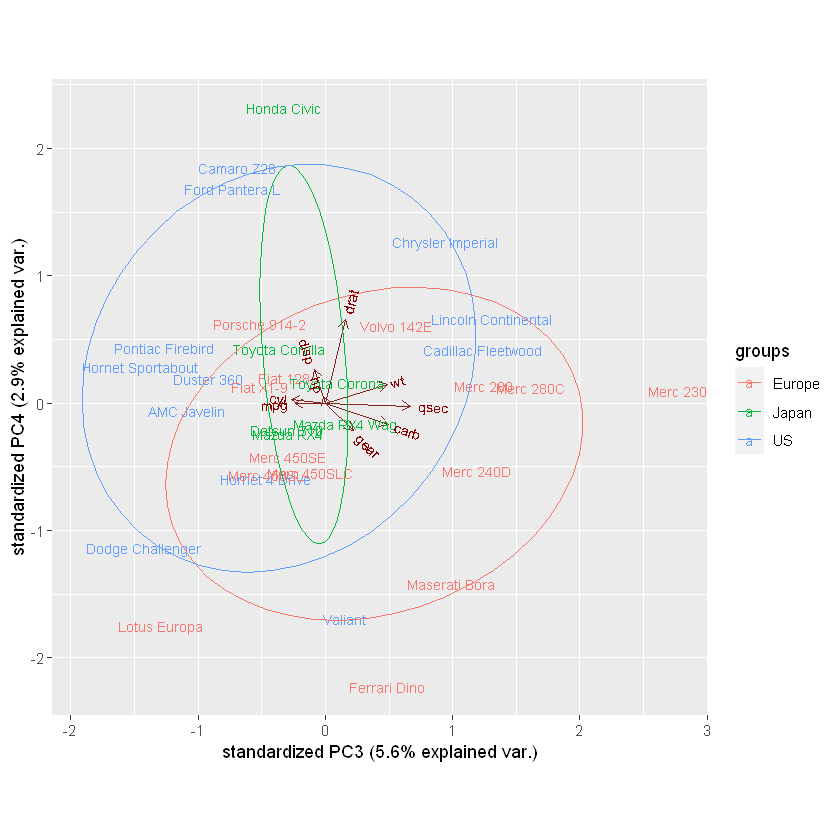